(618, 1100, 3)


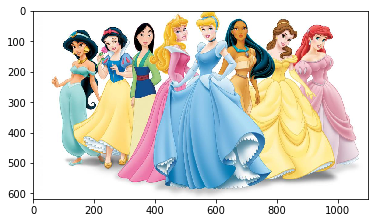

In [16]:
import cv2 #importOpenCV
from matplotlib import pyplot as plt #import mathplotlib
import numpy as np

princess = cv2.imread('princess.jpg')
princessRGB = cv2.cvtColor(princess,cv2.COLOR_BGR2RGB)
print(princessRGB.shape)
plt.imshow(princessRGB)

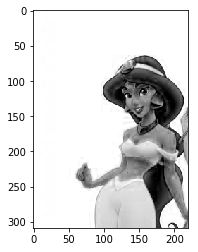

In [2]:
princess2 = cv2.imread('princess.jpg')

#Blue(Gray)
gray = princess2[0:309,0:220]

blue_gray = gray[:,:,0]
plt.imshow(blue_gray,cmap='gray')


In [3]:
rows,cols,channel = princessRGB.shape

store_section = []


row_step = 309
col_step = 220

for i in range(2):
    for j in range(5):
        store_section.append(princessRGB[i*row_step:(i+1)*row_step,j*col_step:(j+1)*col_step])


print(type(store_section))

def saltpepper_noise(image, prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output



blue_img = store_section[1].copy()
blue_img[:,:,1] = 0
blue_img[:,:,2] = 0

green_red_img = store_section[2].copy()
green_red_img[:,:,2] = 0

weight = 100
weight2 = 2
sz = 25
ksize_value = 11

higher_contrast = np.ones(store_section[3].shape,dtype='uint8')
darker = np.ones(store_section[3].shape,dtype='uint8')
negative = np.ones(store_section[3].shape,dtype='uint8')

BlurGauss = cv2.GaussianBlur(store_section[6], (sz,sz), 0)
sobeledgeV = cv2.Sobel(store_section[7], -1, 1, 0, ksize=ksize_value)
S_P = saltpepper_noise(store_section[8],0.25)

for i in range(3):
    higher_contrast[:,:,i] = cv2.multiply(store_section[3][:,:,i],weight2)
    darker[:,:,i] = cv2.subtract(store_section[4][:,:,i],weight)
    negative[:,:,i] = cv2.subtract(255,store_section[5][:,:,i])


        

<class 'list'>


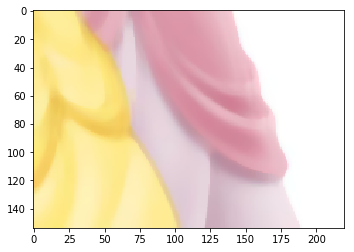

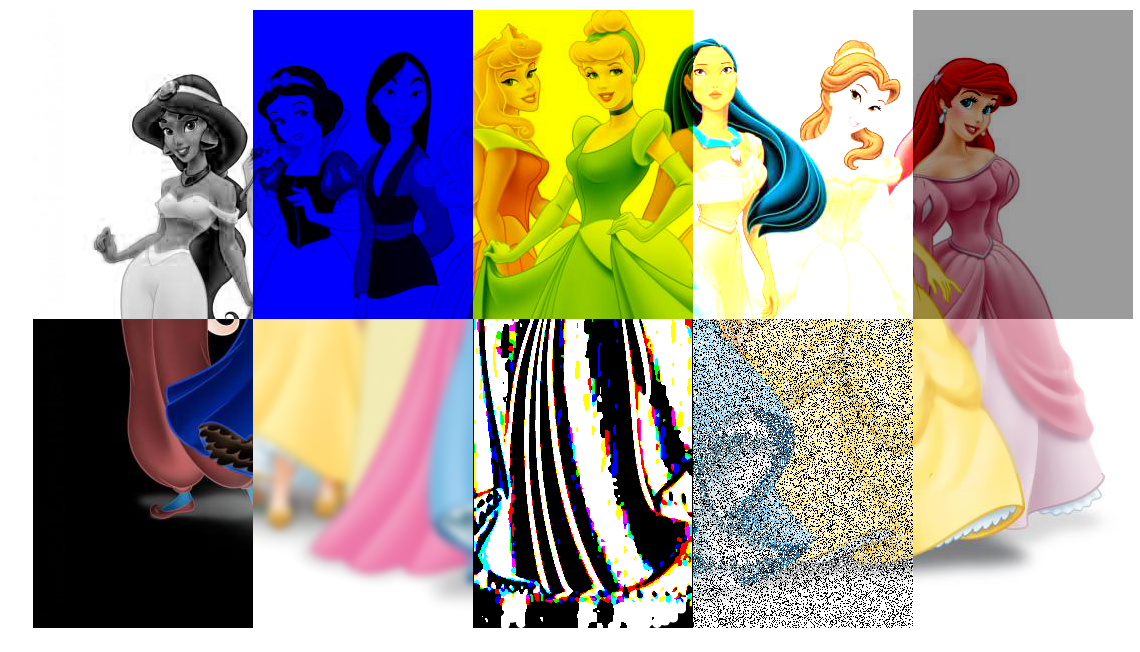

In [30]:
def get_figsize(im):
    # What size does the figure need to be in inches to fit the image?
    dpi = plt.rcParams['figure.dpi']
    dim = im.shape
    figuresize = dim[1]/float(dpi), dim[0]/float(dpi)
    return(figuresize)
def display_image_actual_size_single(im_data):
    figuresize = get_figsize(im_data)
    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figuresize)
    # Add the single axis to fit the image to the screen boundary
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(im_data, cmap='gray')
    ax.axis('off')
    plt.show()
    return(fig)

result_img = princessRGB.copy()

store_section[0] = cv2.cvtColor(blue_gray,cv2.COLOR_GRAY2RGB)
store_section[1] = cv2.cvtColor(blue_img,cv2.COLOR_BGR2RGB)
store_section[2] = green_red_img
store_section[3] = higher_contrast
store_section[4] = darker
store_section[5] = negative
store_section[6] = BlurGauss
store_section[7] = sobeledgeV
store_section[8] = S_P

princess3 = cv2.imread('princess.jpg')
sz2 = 11
roi = princess3[309:463,880:1100]
roi  = cv2.cvtColor(roi,cv2.COLOR_BGR2RGB)
medianFiltered = cv2.medianBlur(roi,sz2)
plt.imshow(medianFiltered)


count = 0 
for i in range(2):
    for j in range(5):
        result_img[i*row_step:(i+1)*row_step,j*col_step:(j+1)*col_step] = store_section[count]
        count +=1

result_img[309:463,880:1100] = medianFiltered

   
fig = display_image_actual_size_single(result_img)
fig.savefig("Transformation.jpg", bbox_inches='tight')